# KuaiRec数据集
KuaiRec数据集是基本全交互的数据集，数据集比KuaiRand更小

In [2]:
import numpy as np
import pandas as pd
import ast
from collections import Counter
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

import warnings; warnings.simplefilter('ignore')
print("environment checked!")

environment checked!


 KuaiRec
  ├── data
  │   ├── big_matrix.csv            大矩阵，密度16.3%
  │   ├── small_matrix.csv          小矩阵，密度99.6%
  │   ├── social_network.csv        好友列表
  │   ├── user_features.csv         用户特征
  │   ├── item_daily_features.csv   视频当日数据
  │   └── item_categories.csv       视频类别标签

加载路径

In [3]:
data_path = "F:/DataSets/KuaiRec/KuaiRec 2.0/data/"
item_categories_path = data_path + "item_categories.csv"

In [4]:
item_categories = pd.read_csv(item_categories_path)
item_categories["feat"] = item_categories["feat"].map(eval)
item_categories.head()

,video_id,feat
0,0,[8]
1,1,"[27, 9]"
2,2,[9]
3,3,[26]
4,4,[5]


## 可视化方法

In [91]:
def visual_continue(df, func=None):
    ax = sns.distplot(df)
    if func:
        func(ax)
    
    gca = plt.gca()
    fig_title = "Statistics of {}".format(df.name)
    gca.set_title(fig_title, fontsize=14)
    gca.set_ylabel("Density", fontsize=14)
    gca.set_xlabel(df.name, fontsize=14)
    
    plt.show()

def visual_statistics_discrete(df, var="my_variable", display_ratio=True, func=None, order=None, size=(6, 4.5)):
    ncount = len(df)

    fig = plt.figure(figsize=size)
    ax1 = fig.add_axes([0.14, 0.15, 0.74, 0.75])
    sns.countplot(x=df, color="#9fc5e8", linewidth=.6, edgecolor='k', ax=ax1, order=order)


    plt.grid(axis='y', linestyle='-.')

    gca = plt.gca()
    fig_title = "Statistics of {}".format(var)
    gca.set_title(fig_title, fontsize=14)
    gca.set_ylabel("Count", fontsize=14)
    gca.set_xlabel(var, fontsize=14)
    
    if func:
        func(ax1)

    if display_ratio:
        # Make twin axis
        ax2 = ax1.twinx()
        ax2.set_ylabel("ratio (%)", fontsize=14)


        for p in ax1.patches:
            x = p.get_bbox().get_points()[:, 0]
            y = p.get_bbox().get_points()[1, 1]
            ax1.annotate('{:.1f}%'.format(100. * y / ncount), (x.mean(), y),
                         ha='center', va='bottom', fontsize=10, rotation=30)  # set the alignment of the text

        ax2.set_ylim(0, ax1.get_ylim()[1] / ncount * 100)

    plt.show()
def visual_trend_change(date_feat_counts, bottom, top):
    # 创建图形和轴对象
    fig, ax = plt.subplots(figsize=(12, 4.5))
    
    # 使用索引作为x值
    x = np.arange(len(date_feat_counts))
    
    # 绘制直方图
    bars = ax.bar(x, date_feat_counts['unique_feats'], color='skyblue')
    
    # 绘制折线图
    ax.plot(x, date_feat_counts['unique_feats'], 'r-o', label='Trend Line')
    
    # 设置x轴的标签
    ax.set_xticks(x)
    ax.set_xticklabels(date_feat_counts['date'], rotation=45)
    
    # 设置y轴的范围
    ax.set_ylim(bottom, top)
    
    # 在直方图的每个顶部显示具体数值
    for i, bar in enumerate(bars):
        height = bar.get_height()
        ax.annotate(f'{height}',
                    xy=(i, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
    
    # 设置坐标轴标签
    ax.set_xlabel('Date')
    ax.set_ylabel('feat')
    
    # 显示图例
    ax.legend()
    
    # 显示图形
    plt.tight_layout()  # 调整图形以适应标签
    plt.show()


## 统计视频的类别数
大矩阵应该全，小矩阵应该不全
有31个视频标签

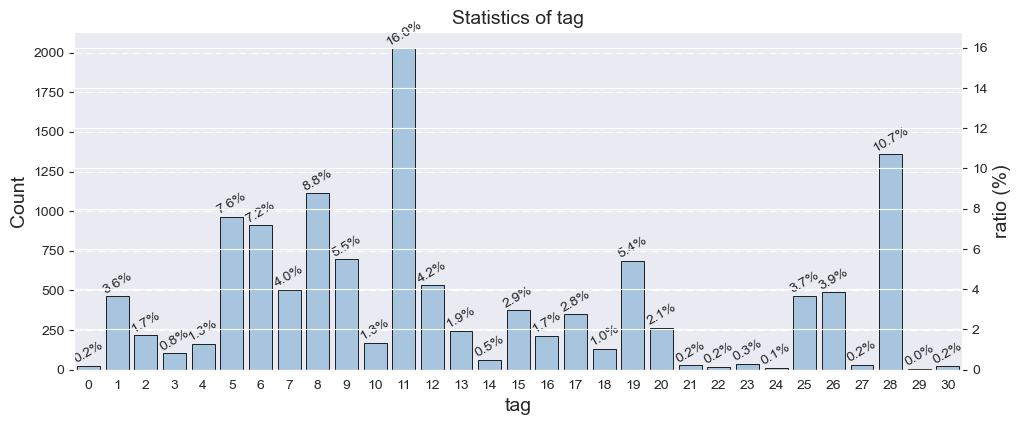

In [6]:
cnt = item_categories.feat.map(Counter)
cnt_all = Counter()
for d in cnt:
    cnt_all.update(d)
# print(dict(cnt_all))
all_feat = pd.Series(sorted(list(itertools.chain.from_iterable([[i]*k for i,k in cnt_all.items()]))),name="feat")
# print(all_feat)
visual_statistics_discrete(all_feat, "tag", size=(12,4.5))

## 统计大矩阵的用户使用时段

In [7]:
big_data_path = data_path + "big_matrix.csv"
big_data = pd.read_csv(big_data_path)
big_data.head()

,user_id,video_id,play_duration,video_duration,time,date,timestamp,watch_ratio
0,0,3649,13838,10867,2020-07-05 00:08:23.438,20200705,1.593879e+09,1.273397
1,0,9598,13665,10984,2020-07-05 00:13:41.297,20200705,1.593879e+09,1.244082
2,0,5262,851,7908,2020-07-05 00:16:06.687,20200705,1.593879e+09,0.107613
3,0,1963,862,9590,2020-07-05 00:20:26.792,20200705,1.593880e+09,0.089885
4,0,8234,858,11000,2020-07-05 00:43:05.128,20200705,1.593881e+09,0.078000


In [38]:
big_data.describe()

,user_id,video_id,play_duration,video_duration,date,timestamp,watch_ratio
count,1.253081e+07,1.253081e+07,1.253081e+07,1.253081e+07,1.253081e+07,1.253081e+07,1.253081e+07
mean,3.574377e+03,5.057748e+03,9.027027e+03,1.462157e+04,2.020080e+07,1.596799e+09,9.445059e-01
std,2.067008e+03,3.089868e+03,1.547343e+04,1.983474e+04,5.080192e+01,1.514698e+06,1.674601e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,1.400000e+02,2.020070e+07,1.592872e+09,0.000000e+00
25%,1.788000e+03,2.387000e+03,4.218000e+03,7.434000e+03,2.020080e+07,1.596339e+09,3.148246e-01
50%,3.578000e+03,4.822000e+03,7.277000e+03,9.636000e+03,2.020081e+07,1.596669e+09,7.234710e-01
75%,5.343750e+03,7.600000e+03,1.035000e+04,1.217900e+04,2.020083e+07,1.598502e+09,1.177644e+00
max,7.175000e+03,1.072700e+04,9.996390e+05,3.150720e+05,2.020090e+07,1.599694e+09,5.734571e+02


日期从2020.7.5到2020.9.5，为期2个月，但只有28天的数据，分为3个观察窗

In [42]:
print(big_data.date.min())
print(big_data.date.max())
print(len(big_data['date'].value_counts()))

20200705
20200905
28


## 统计类别变化怎么统计？
只有1级类别

### 系统覆盖率
步骤：
1. 大矩阵，根据video_id，在item_categories找到对应的视频标签
2. 按照date排序，统计相同date中，unique_feat的个数 

In [76]:
origin_data = pd.merge(big_data, item_categories, on='video_id', how='left')
# print(origin_data.head())
feature = ["date", "video_id", "feat"]
merged_data = origin_data[feature]
merged_data.head()

,date,video_id,feat
0,20200705,3649,[9]
1,20200705,9598,[28]
2,20200705,5262,[25]
3,20200705,1963,"[9, 28]"
4,20200705,8234,[6]


In [27]:
print(type(merged_data['feat'].iloc[0]))

<class 'list'>


In [54]:
# 展开feat列中的列表到新的行
exploded_data = merged_data.explode('feat')
# exploded_data.head()
# 按date分组，并计算每个日期的唯一feat数
date_feat_counts = exploded_data.groupby('date')['feat'].nunique().reset_index()
date_feat_counts.columns = ['date', 'unique_feats']
date_feat_counts.describe()

,date,unique_feats
count,2.800000e+01,28.00000
mean,2.020080e+07,30.50000
std,6.795006e+01,0.83887
min,2.020070e+07,28.00000
25%,2.020071e+07,30.00000
50%,2.020081e+07,31.00000
75%,2.020083e+07,31.00000
max,2.020090e+07,31.00000


In [56]:
date_feat_counts["date"] -= 20200000
date_feat_counts.head()

,date,unique_feats
0,705,28
1,706,29
2,707,29
3,708,29
4,709,30


就算以每天为一个观察窗口，基本类别覆盖率没有变化，最小28最大31，即最小90%，最大100%
甚至是增长趋势

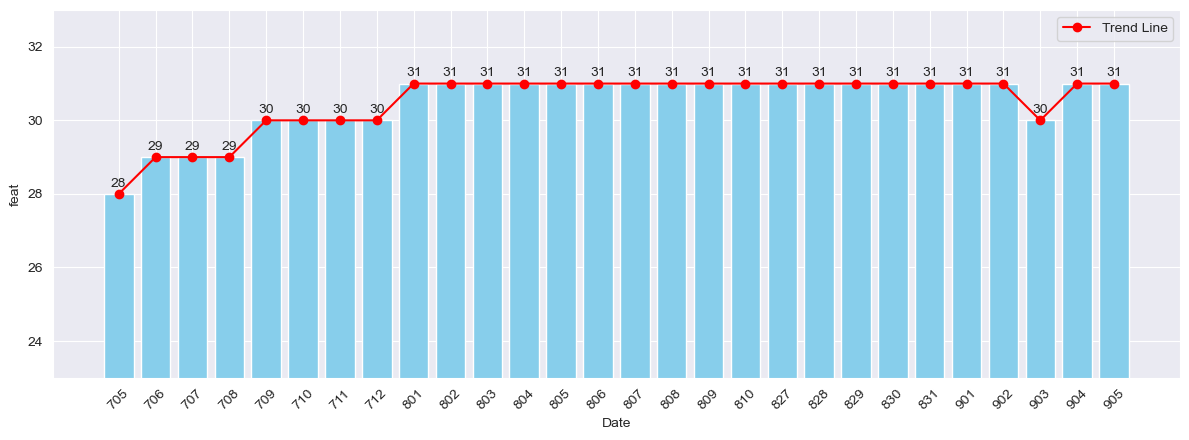

In [61]:
# 创建图形和轴对象
fig, ax = plt.subplots(figsize=(12, 4.5))

# 使用索引作为x值
x = np.arange(len(date_feat_counts))

# 绘制直方图
bars = ax.bar(x, date_feat_counts['unique_feats'], color='skyblue')

# 绘制折线图
ax.plot(x, date_feat_counts['unique_feats'], 'r-o', label='Trend Line')

# 设置x轴的标签
ax.set_xticks(x)
ax.set_xticklabels(date_feat_counts['date'], rotation=45)

# 设置y轴的范围
ax.set_ylim(23, 33)

# 在直方图的每个顶部显示具体数值
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(i, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# 设置坐标轴标签
ax.set_xlabel('Date')
ax.set_ylabel('feat')

# 显示图例
ax.legend()

# 显示图形
plt.tight_layout()  # 调整图形以适应标签
plt.show()


### 个别用户的类别变化
步骤：
1. 找出一个user_id
2. 按照date统计feat数
3. 画出图
问题：找哪个user呢？

In [66]:
# user_id 0-7175
big_data["user_id"].min()
big_data["user_id"].max()

7175

可视化个人类别覆盖,输入用户id,例如user_id = 0 ————> chosen_user_tend_change(0)
用户范围0-7175
并不是每个用户都交互满了28天

In [93]:
def chosen_user_tend_change(chosen = 0):
    # 选择的用户id chosen
    chosen_data = origin_data[origin_data["user_id"]  == chosen]
    chosen_feature = ["date", "feat"]
    # print(type(chosen_data['feat'].iloc[0]))
    chosen_data = chosen_data[chosen_feature]
    chosen_data["date"] -= 20200000
    chosen_data.head()
    
    # 展开feat列中的列表到新的行
    exploded_data = chosen_data.explode('feat')
    # 按date分组，并计算每个日期的唯一feat数
    chosen_data_counts = exploded_data.groupby('date')['feat'].nunique().reset_index()
    chosen_data_counts.columns = ['date', 'unique_feats']
    chosen_data_counts.head()
    
    visual_trend_change(chosen_data_counts, 0 , 31)

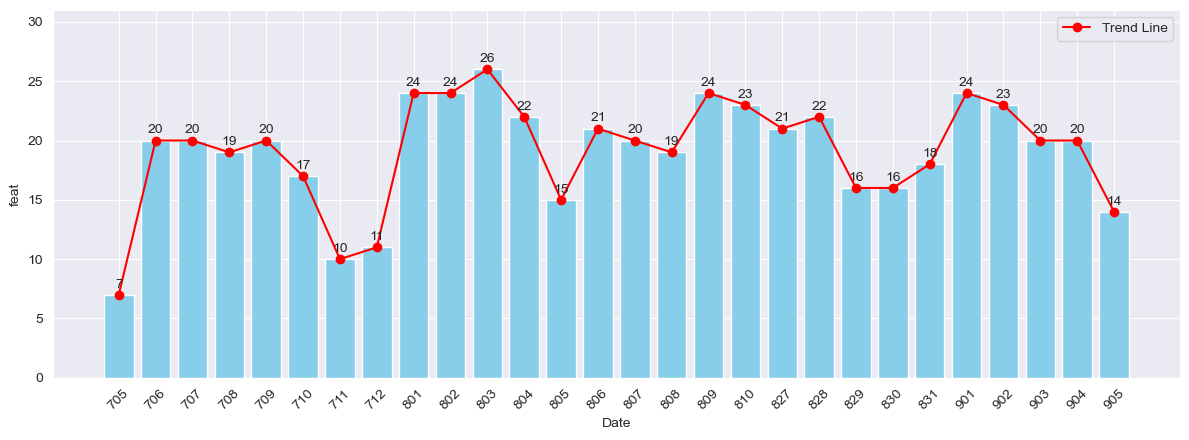

In [102]:
chosen_user_tend_change(0)

### 用户类别组成饼图

### 平均用户覆盖度变化？
步骤：
1. 计算每个用户的类别数
2. 形成user_id,date,feat的数据表
3. 统计每个date下，每个用户对应feat的平均值？(相当于，每个user_daily_feat求和除以user_num)
4. 形成数据表，date,user_avg_feat

### 用户in out 